# Наивный байесовский классификатор (Заданий 2)
Таблица содержит данные о классификации писем на «спам»/«не спам» и общее количество слов, входящих в эти группы:


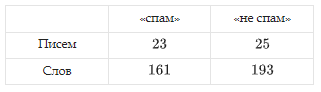

Во второй таблице представлены данные, по уникальным словам, и числу их вхождений в указанные группы:

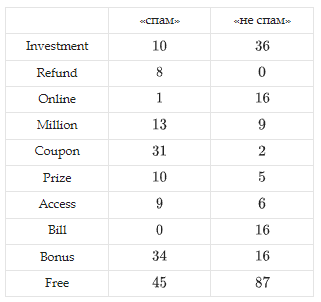

Ваша задача построить модель наивного байесовского классификатора и определить класс, к которому будет
отнесено письмо, содержащее текст:

**Free Offer Access Purchase Prize Bonus Online**

1. Определите вероятность того, что письмо является спамом, исходя из тренировочного набора данных.
2. Вычислите $F$("спам").
3. Вычислите $F$("не спам").
4. Вычислите вероятность $P$(Класс = "спам"|Письмо), что письмо **Free Offer Access Purchase Prize Bonus Online** является спамом.

     X   Y  Class
id               
1   31  19      0
2   45  23      1
3   15  46      1
4   92  82      1
5   78  29      1
6   58  34      0
7   25  19      1
8   29  93      1
9   84  82      1
10  82  27      0


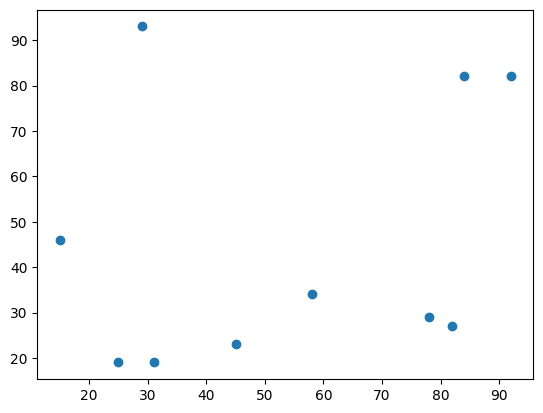

Евклидова метрика 
Расстояние до ближайшего объекта:  8.602
Индентификаторы трех ближайших точек:  2 6 1
Класс для нового объекта:  0 

Манхэттенское расстояние 
Расстояние до ближайшего объекта:  12.0
Индентификаторы трех ближайших точек: 2 6 1
Класс для нового объекта:  0


In [24]:
from pandas import Series, DataFrame
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/data.csv', delimiter=',', decimal='.', index_col = 0) #Открываем исходные данные
print(data)

plt.scatter(data.X, data.Y)
plt.show()

x = np.array(data.drop(columns=['Class'])) #Предикторы
y = np.array(data.Class) #Ожидаемые значения

neigh = NearestNeighbors(n_neighbors=3, p=2)
neigh.fit(x)

New_point = neigh.kneighbors([[52, 18]])
print('Евклидова метрика \nРасстояние до ближайшего объекта: ', np.around(New_point[0][0][0], decimals=3))
print('Индентификаторы трех ближайших точек: ', *New_point[1][0]+1) #Прибавляем единицу, так как в sk идентификаторы начинаются с 0

model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(x, y)

print('Класс для нового объекта: ', *model.predict([[52, 18]]), '\n')

neigh = NearestNeighbors(n_neighbors=3, p=1)
neigh.fit(x)
New_point = neigh.kneighbors([[52, 18]])
print('Манхэттенское расстояние \nРасстояние до ближайшего объекта: ', np.around(New_point[0][0][0], decimals=3))
print('Индентификаторы трех ближайших точек:', *New_point[1][0]+1)

model = KNeighborsClassifier(n_neighbors=3, p=1)
model.fit(x, y)

print('Класс для нового объекта: ', *model.predict([[52, 18]]))